In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from functions import find_columns_with_ones
from functions import categorize_age
import plotly.express as px
import plotly.graph_objs as go


In [4]:
# All Main Data in one dataframe imported to be cleaned
overdose_df = pd.read_csv("overdose_data.csv", index_col="ID")
opioid_columns = ['Fentanyl', 'Morphine', 'Codeine', 'Norfentanyl', 'Methadone', 'Heroin']
yes_no_columns = ['Alcohol', 'Heroin', 'Methamphetamine', 'Cocaine', 'RX', 'Opioids', 'THC', 'Fentanyl', 'Morphine', 'Codeine', 'Norfentanyl', 'Methadone', 'Amphetamines']
overdose_df['Opioids'] = overdose_df.apply(
    lambda row: 'Yes' if row['Opioids'] == 'Yes' or 'Yes' in row[opioid_columns].values else 'No', axis=1)
overdose_df.replace({'No': 0, 'Yes': 1}, inplace=True)
overdose_df.head()

,Year,Age,Gender,Type,Alcohol,Heroin,Methamphetamine,Cocaine,RX,Opioids,THC,Fentanyl,Codeine,Norfentanyl,Methadone,Morphine,Amphetamines
ID,,,,,,,,,,,,,,,,,
1,2008,38,Female,Accidental,0.0,0.0,0.0,0.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,43,Male,Accidental,0.0,0.0,0.0,0.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,55,Male,Accidental,0.0,0.0,0.0,1.0,1.0,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,52,Male,Accidental,0.0,0.0,0.0,0.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2008,42,Male,Accidental,1.0,0.0,0.0,0.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN


## Yearly Overdose Death Count

In [138]:
yearly_overdose_count = overdose_df['Year'].value_counts()

# Assuming yearly_overdose_count is a Series containing the counts of overdoses per year
# Create a DataFrame for plotting
yearly_overdose_df = yearly_overdose_count.reset_index()
yearly_overdose_df = yearly_overdose_df.set_index('Year')
yearly_overdose_df = yearly_overdose_df.sort_values('Year')
yearly_overdose_df

,count
Year,
2008,5
2009,6
2010,15
2011,13
2012,13
2013,11
2014,9
2015,12
2016,21


## Age Statistics

In [99]:
average_age_by_year = overdose_df['Age'].groupby(overdose_df['Year']).mean('Age').round()
average_age_by_gender = overdose_df.groupby('Gender').mean('Age').round()
average_age_by_year

Year
2008    46.0
2009    41.0
2010    39.0
2011    40.0
2012    46.0
2013    44.0
2014    48.0
2015    42.0
2016    45.0
2017    42.0
2018    42.0
2019    46.0
2020    38.0
2021    37.0
2022    47.0
Name: Age, dtype: float64

In [5]:
sliced_age_df = overdose_df[['Age', 'Year', 'Gender']].copy()

In [8]:
sliced_age_df['Age Range'] = pd.cut(sliced_age_df['Age'], bins=[0, 18, 75, float('inf')], labels=['Adolescent/Teenager', 'Adult', 'Senior'])
sliced_age_df.drop('Age', axis=1, inplace=True)

In [10]:
sliced_age_df.value_counts('Age Range')

Age Range
Adult                  284
Senior                   3
Adolescent/Teenager      2
Name: count, dtype: int64

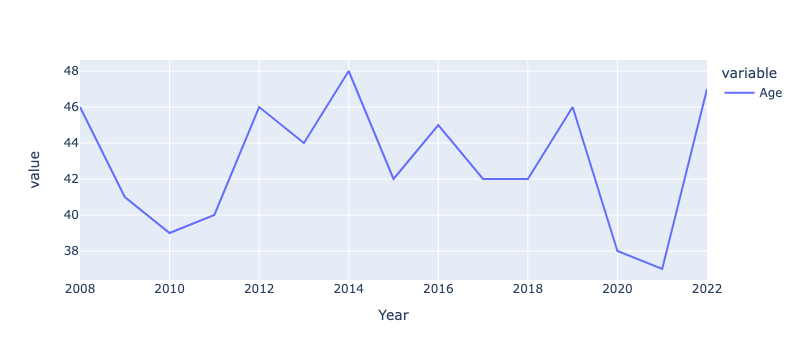

In [100]:
average_age_by_year_plot = px.line(average_age_by_year)
average_age_by_year_plot.show()

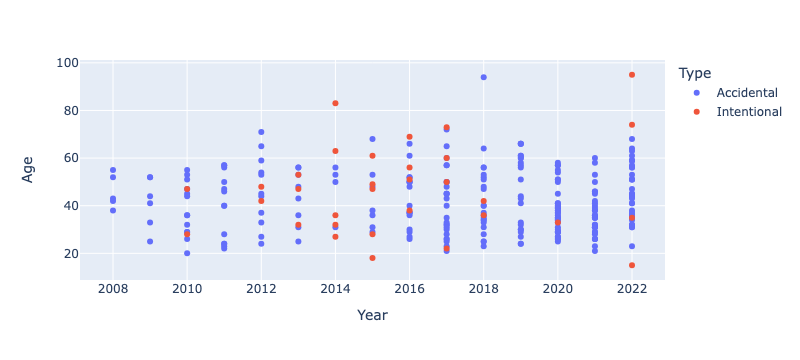

In [131]:
age_scatter = px.scatter(overdose_df, x='Year', y='Age', color='Type')
age_scatter.show()

In [102]:
age_count = overdose_df['Age'].value_counts()
min_age = overdose_df['Age'].min()
max_age = overdose_df['Age'].max()

## Type Statictics

In [103]:
type_count = overdose_df['Type'].value_counts()
type_count

Type
Accidental     256
Intentional     32
Name: count, dtype: int64

In [104]:
type_count_by_year = overdose_df['Type'].groupby(overdose_df['Year']).value_counts()

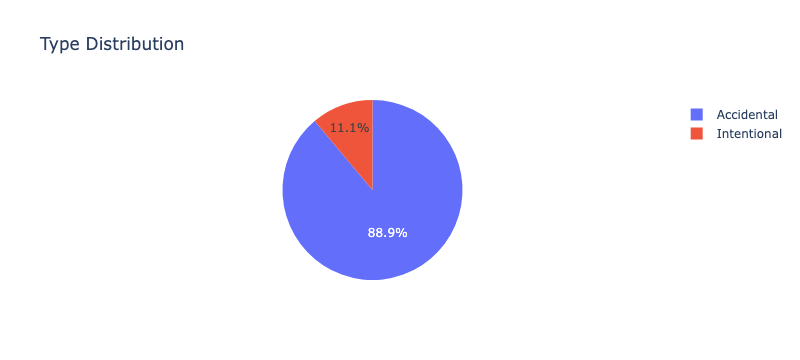

In [105]:
type_chart = px.pie(type_count, values=type_count.values, names=type_count.index, title='Type Distribution')
type_chart.show()

## Overall Count by Drug

In [106]:
# Most Common Drug Overall
columns_to_exclude = ['Year', 'Age', 'Gender', 'Type']
overdose_df_sliced = overdose_df.drop(columns=columns_to_exclude)
overdose_df_sliced = overdose_df_sliced.apply(pd.to_numeric, errors='coerce')
overdose_df_sliced = overdose_df_sliced.fillna(0)
overdose_df_count = (overdose_df_sliced == 1).sum()

overdose_df_count

Alcohol             73
Heroin              35
Methamphetamine     98
Cocaine             45
RX                 136
Opioids            230
THC                 43
Fentanyl           141
Codeine              4
Norfentanyl         17
Methadone            3
Morphine            26
Amphetamines        34
dtype: int64

## Drug presence count by year

In [107]:
# Group by year and sum the occurrences of each substance
overdose_df_count_by_year = overdose_df_sliced.groupby(overdose_df['Year']).sum()
overdose_df_count_by_year

,Alcohol,Heroin,Methamphetamine,Cocaine,RX,Opioids,THC,Fentanyl,Codeine,Norfentanyl,Methadone,Morphine,Amphetamines
Year,,,,,,,,,,,,,
2008,1.0,0.0,0.0,1.0,5.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,2.0,2.0,1.0,2.0,3.0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2010,7.0,4.0,2.0,0.0,11.0,12,2.0,6.0,0.0,0.0,0.0,0.0,0.0
2011,5.0,5.0,3.0,6.0,9.0,10,4.0,3.0,0.0,0.0,0.0,0.0,0.0
2012,6.0,1.0,1.0,3.0,12.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2013,5.0,2.0,2.0,2.0,10.0,9,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2014,3.0,0.0,1.0,2.0,8.0,5,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2015,2.0,0.0,3.0,0.0,11.0,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016,2.0,3.0,7.0,2.0,19.0,19,6.0,4.0,0.0,0.0,0.0,0.0,0.0


## Gender Count

In [108]:
gender_count = overdose_df['Gender'].value_counts()

In [109]:
gender_count_by_year = overdose_df['Gender'].groupby(overdose_df['Year']).value_counts()

## Most Common Combination

In [14]:
result = find_columns_with_ones(overdose_df)

In [15]:
# Extract tuples from the dictionary values
combinations = list(result.values())

# Use Counter to count occurrences of each combination
combination_counts = Counter(combinations)

# Find the most common combination
most_common_combination, count = combination_counts.most_common(1)[0]

# Print the most common combination and its count
print(f"The most common combination is: {most_common_combination} with {count} occurrences.")


The most common combination is: ('Opioids', 'RX') with 29 occurrences.


In [18]:
combination_counts

Counter({('Opioids', 'RX'): 29,
         ('Fentanyl', 'Methamphetamine', 'Opioids'): 18,
         ('Fentanyl', 'Opioids'): 16,
         ('Alcohol', 'Opioids', 'RX'): 14,
         ('RX',): 10,
         ('Alcohol', 'RX'): 9,
         ('Alcohol', 'Fentanyl', 'Methamphetamine', 'Opioids'): 9,
         ('Fentanyl', 'Opioids', 'RX'): 7,
         ('Fentanyl', 'Morphine', 'Opioids'): 7,
         ('Cocaine', 'Fentanyl', 'Opioids'): 7,
         ('Methamphetamine', 'Opioids', 'RX'): 6,
         ('Amphetamines', 'Methamphetamine'): 6,
         ('Opioids', 'RX', 'THC'): 5,
         (): 5,
         ('Amphetamines', 'Fentanyl', 'Opioids'): 5,
         ('Methamphetamine',): 5,
         ('Cocaine', 'Opioids', 'RX'): 4,
         ('Amphetamines', 'Fentanyl', 'Methamphetamine', 'Opioids'): 4,
         ('Fentanyl', 'Heroin', 'Opioids'): 3,
         ('Alcohol',): 3,
         ('Alcohol', 'Methamphetamine'): 3,
         ('Fentanyl', 'Opioids', 'RX', 'THC'): 3,
         ('Fentanyl', 'Methamphetamine', 'Opioids

In [112]:
# Convert Counter object to DataFrame
df_combinations = pd.DataFrame(combination_counts.items(), columns=['combination', 'count'])
df_combinations['combination'] = df_combinations['combination'].apply(lambda x: ', '.join(x))

# Create bar chart
#combination_chart = px.bar(df_combinations, x='count', y='combination', title='Substance Combinations', width=5000, height=1000)

#combination_chart.show()


# Arrest Data

In [113]:
arrests_2018 = pd.read_csv("new_2018.csv")
arrests_2019 = pd.read_csv("new_2019.csv")
arrests_2020 = pd.read_csv("new_2020.csv")
arrests_2021 = pd.read_csv("new_2021.csv")
arrests_2022 = pd.read_csv("new_2022.csv")

## 2018 Data Cleansing 
Todo:
    - Remove all but total columns

In [114]:
arrests_2018 = arrests_2018.drop(columns=['Agency Name.1', 'County.1', 'Adult Or Juvenile'])
arrests_2018 = arrests_2018[arrests_2018['Unnamed: 5'] == 'Arrest Count']
arrests_2018 = arrests_2018.rename(columns={
    'County': 'County',
    'Agency Name': 'Agency_Name',
    'Unnamed: 5': 'Metric',
    'Drug Sale - Opium/Cocaine': 'Drug_Sale_Opium_Cocaine',
    'Drug Sale - Marijuana': 'Drug_Sale_Marijuana',
    'Drug Sale - Synthetic': 'Drug_Sale_Synthetic',
    'Drug Sale - Other Dangerous': 'Drug_Sale_Other_Dangerous',
    'Drug Possession - Opium/Cocaine': 'Drug_Possession_Opium_Cocaine',
    'Drug Possession - Marijuana': 'Drug_Possession_Marijuana',
    'Drug Possession - Synthetic': 'Drug_Possession_Synthetic',
    'Drug Possession - Other Dangerous': 'Drug_Possession_Other_Dangerous',
    'Drug - Unknown': 'Drug_Unknown'
})
arrests_2018['Year'] = 2018
arrests_2018 = arrests_2018.set_index('Year')
arrests_2018.head()

,County,Agency_Name,Metric,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous,Drug_Unknown
Year,,,,,,,,,,,,
2018,La Crosse,Bangor PD,Arrest Count,0,0,0,0,0,3,0,1,0
2018,La Crosse,Campbell PD,Arrest Count,0,0,0,4,2,11,0,5,0
2018,La Crosse,Holmen PD,Arrest Count,0,0,0,0,0,25,0,7,0
2018,La Crosse,La Crosse Co SO,Arrest Count,6,0,0,0,12,61,1,33,1
2018,La Crosse,La Crosse PD,Arrest Count,38,8,0,27,71,312,16,216,0


## 2019 Data Cleansing
Todo:
    - Remove all but total columns

In [115]:
arrests_2019 = arrests_2019.drop(columns=['Agency Name.1', 'County.1', 'Adult Or Juvenile'])
arrests_2019 = arrests_2019[arrests_2019['Unnamed: 5'] == 'Arrest Count']
arrests_2019 = arrests_2019.rename(columns={
    'County': 'County',
    'Agency Name': 'Agency_Name',
    'Unnamed: 5': 'Metric',
    'Drug Sale - Opium/Cocaine': 'Drug_Sale_Opium_Cocaine',
    'Drug Sale - Marijuana': 'Drug_Sale_Marijuana',
    'Drug Sale - Synthetic': 'Drug_Sale_Synthetic',
    'Drug Sale - Other Dangerous': 'Drug_Sale_Other_Dangerous',
    'Drug Possession - Opium/Cocaine': 'Drug_Possession_Opium_Cocaine',
    'Drug Possession - Marijuana': 'Drug_Possession_Marijuana',
    'Drug Possession - Synthetic': 'Drug_Possession_Synthetic',
    'Drug Possession - Other Dangerous': 'Drug_Possession_Other_Dangerous',
    'Drug - Unknown': 'Drug_Unknown'
})
arrests_2019['Year'] = 2019
arrests_2019 = arrests_2019.set_index('Year')
arrests_2019

,County,Agency_Name,Metric,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous,Drug_Unknown
Year,,,,,,,,,,,,
2019,La Crosse,Bangor PD,Arrest Count,0,0,0,0,0,1,0,0,0
2019,La Crosse,Campbell PD,Arrest Count,1,0,0,2,2,9,0,11,0
2019,La Crosse,Holmen PD,Arrest Count,0,2,0,2,1,33,1,25,0
2019,La Crosse,La Crosse Co SO,Arrest Count,6,0,0,5,9,35,2,20,1
2019,La Crosse,La Crosse PD,Arrest Count,22,2,1,18,105,292,5,170,1
2019,La Crosse,Onalaska PD,Arrest Count,3,1,0,1,10,26,4,20,0
2019,La Crosse,UW-La Crosse PD,Arrest Count,0,0,0,0,1,59,1,3,0
2019,La Crosse,West Salem PD,Arrest Count,0,0,0,0,2,16,0,11,0
2019,La Crosse,Total,Arrest Count,32,5,1,28,130,471,13,260,2


## 2020 Data Cleansing

In [116]:
arrests_2020 = arrests_2020.drop(columns=['Agency Name.1', 'County.1', 'Adult Or Juvenile'])
arrests_2020 = arrests_2020[arrests_2020['Unnamed: 5'] == 'Arrest Count']
arrests_2020 = arrests_2020.rename(columns={
    'County': 'County',
    'Agency Name': 'Agency_Name',
    'Unnamed: 5': 'Metric',
    'Drug Sale - Opium/Cocaine': 'Drug_Sale_Opium_Cocaine',
    'Drug Sale - Marijuana': 'Drug_Sale_Marijuana',
    'Drug Sale - Synthetic': 'Drug_Sale_Synthetic',
    'Drug Sale - Other Dangerous': 'Drug_Sale_Other_Dangerous',
    'Drug Possession - Opium/Cocaine': 'Drug_Possession_Opium_Cocaine',
    'Drug Possession - Marijuana': 'Drug_Possession_Marijuana',
    'Drug Possession - Synthetic': 'Drug_Possession_Synthetic',
    'Drug Possession - Other Dangerous': 'Drug_Possession_Other_Dangerous',
    'Drug - Unknown': 'Drug_Unknown'
})
arrests_2020['Year'] = 2020
arrests_2020 = arrests_2020.set_index('Year')
arrests_2020

,County,Agency_Name,Metric,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous,Drug_Unknown
Year,,,,,,,,,,,,
2020,La Crosse,Bangor PD,Arrest Count,0,0,0,0,0,0,0,0,0
2020,La Crosse,Campbell PD,Arrest Count,0,1,0,0,4,6,1,14,0
2020,La Crosse,Holmen PD,Arrest Count,0,0,0,0,5,17,1,8,0
2020,La Crosse,La Crosse Co SO,Arrest Count,0,0,0,2,3,16,1,22,0
2020,La Crosse,La Crosse PD,Arrest Count,12,3,2,33,85,161,7,129,1
2020,La Crosse,Onalaska PD,Arrest Count,0,0,0,4,1,18,0,21,0
2020,La Crosse,UW-La Crosse PD,Arrest Count,0,0,0,0,0,53,1,1,0
2020,La Crosse,West Salem PD,Arrest Count,0,0,0,0,1,17,1,5,0
2020,La Crosse,Total,Arrest Count,12,4,2,39,99,288,12,200,1


## 2021 Data Cleansing

In [117]:
arrests_2021 = arrests_2021.drop(columns=['Agency Name.1', 'County.1', 'Adult Or Juvenile'])
arrests_2021 = arrests_2021[arrests_2021['Unnamed: 5'] == 'Arrest Count']
arrests_2021 = arrests_2021.rename(columns={
    'County': 'County',
    'Agency Name': 'Agency_Name',
    'Unnamed: 5': 'Metric',
    'Drug Sale - Opium/Cocaine': 'Drug_Sale_Opium_Cocaine',
    'Drug Sale - Marijuana': 'Drug_Sale_Marijuana',
    'Drug Sale - Synthetic': 'Drug_Sale_Synthetic',
    'Drug Sale - Other Dangerous': 'Drug_Sale_Other_Dangerous',
    'Drug Possession - Opium/Cocaine': 'Drug_Possession_Opium_Cocaine',
    'Drug Possession - Marijuana': 'Drug_Possession_Marijuana',
    'Drug Possession - Synthetic': 'Drug_Possession_Synthetic',
    'Drug Possession - Other Dangerous': 'Drug_Possession_Other_Dangerous',
    'Drug - Unknown': 'Drug_Unknown'
})
arrests_2021['Year'] = 2021
arrests_2021 = arrests_2021.set_index('Year')
arrests_2021

,County,Agency_Name,Metric,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous,Drug_Unknown
Year,,,,,,,,,,,,
2021,La Crosse,Bangor PD,Arrest Count,0,0,0,0,0,3,0,1,0
2021,La Crosse,Campbell PD,Arrest Count,1,0,1,1,4,5,1,5,0
2021,La Crosse,Holmen PD,Arrest Count,2,0,0,1,1,24,0,2,0
2021,La Crosse,La Crosse Co SO,Arrest Count,3,0,0,2,7,22,0,19,1
2021,La Crosse,La Crosse PD,Arrest Count,7,4,9,20,71,139,5,111,2
2021,La Crosse,Onalaska PD,Arrest Count,1,0,0,1,3,12,0,20,0
2021,La Crosse,UW-La Crosse PD,Arrest Count,0,0,0,0,0,32,0,0,0
2021,La Crosse,West Salem PD,Arrest Count,0,0,0,0,3,23,0,17,0
2021,La Crosse,Total,Arrest Count,14,4,10,25,89,260,6,175,3


## 2022 Data Cleansing

In [118]:
arrests_2022 = arrests_2022.drop(columns=['Agency Name.1', 'County.1', 'Adult Or Juvenile'])
arrests_2022 = arrests_2022[arrests_2022['Unnamed: 5'] == 'Arrest Count']
arrests_2022 = arrests_2022.rename(columns={
    'County': 'County',
    'Agency Name': 'Agency_Name',
    'Unnamed: 5': 'Metric',
    'Drug Sale - Opium/Cocaine': 'Drug_Sale_Opium_Cocaine',
    'Drug Sale - Marijuana': 'Drug_Sale_Marijuana',
    'Drug Sale - Synthetic': 'Drug_Sale_Synthetic',
    'Drug Sale - Other Dangerous': 'Drug_Sale_Other_Dangerous',
    'Drug Possession - Opium/Cocaine': 'Drug_Possession_Opium_Cocaine',
    'Drug Possession - Marijuana': 'Drug_Possession_Marijuana',
    'Drug Possession - Synthetic': 'Drug_Possession_Synthetic',
    'Drug Possession - Other Dangerous': 'Drug_Possession_Other_Dangerous',
    'Drug - Unknown': 'Drug_Unknown'
})
arrests_2022['Year'] = 2022
arrests_2022 = arrests_2022.set_index('Year')
arrests_2022

,County,Agency_Name,Metric,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous,Drug_Unknown
Year,,,,,,,,,,,,
2022,La Crosse,Bangor PD,Arrest Count,0,0,0,0,0,8,0,0,0
2022,La Crosse,Campbell PD,Arrest Count,0,0,0,3,5,5,1,11,0
2022,La Crosse,Holmen PD,Arrest Count,1,3,0,0,3,23,0,4,0
2022,La Crosse,La Crosse Co SO,Arrest Count,0,0,1,0,2,10,1,11,0
2022,La Crosse,La Crosse PD,Arrest Count,7,2,6,18,44,181,12,106,0
2022,La Crosse,Onalaska PD,Arrest Count,3,2,0,1,4,22,3,19,0
2022,La Crosse,UW-La Crosse PD,Arrest Count,0,0,0,0,0,3,0,0,0
2022,La Crosse,West Salem PD,Arrest Count,0,0,0,0,0,17,3,7,0
2022,La Crosse,Total,Arrest Count,11,7,7,22,58,269,20,158,0


In [134]:
all_arrests = pd.concat([arrests_2018, arrests_2019, arrests_2020, arrests_2021, arrests_2022])


In [135]:
total_arrests = all_arrests[all_arrests['Agency_Name'] == 'Total']

In [136]:
total_arrests = total_arrests.drop(columns=['County', 'Agency_Name', 'Metric', 'Drug_Unknown'])

In [137]:
total_arrests.to_csv("total_arrests.csv")

In [123]:
comparable_od_data = overdose_df_count_by_year.loc[2018:2022]

In [124]:
comparable_od_data

,Alcohol,Heroin,Methamphetamine,Cocaine,RX,Opioids,THC,Fentanyl,Codeine,Norfentanyl,Methadone,Morphine,Amphetamines
Year,,,,,,,,,,,,,
2018,4.0,0.0,0.0,4.0,6.0,21,5.0,18.0,0.0,0.0,0.0,12.0,10.0
2019,8.0,4.0,11.0,3.0,4.0,16,2.0,14.0,0.0,0.0,0.0,5.0,3.0
2020,7.0,4.0,23.0,5.0,11.0,31,9.0,27.0,3.0,17.0,2.0,7.0,20.0
2021,1.0,2.0,13.0,3.0,0.0,27,0.0,27.0,1.0,0.0,1.0,2.0,1.0
2022,14.0,0.0,22.0,11.0,6.0,27,0.0,25.0,0.0,0.0,0.0,0.0,0.0


In [125]:
od_data_catergorized = pd.DataFrame({
    'Opium/Cocaine': comparable_od_data['Cocaine'] + comparable_od_data['Codeine'] + comparable_od_data['Heroin'] + comparable_od_data['Morphine'],
    'Marijuana': comparable_od_data['THC'],
    'Synthetic': comparable_od_data['Opioids'] + comparable_od_data['Fentanyl'] + comparable_od_data['Norfentanyl'] + comparable_od_data['Methadone'],
    'Other Dangerous': comparable_od_data['Amphetamines'] + comparable_od_data['Methamphetamine']
})
od_data_catergorized

,Opium/Cocaine,Marijuana,Synthetic,Other Dangerous
Year,,,,
2018,16.0,5.0,39.0,10.0
2019,12.0,2.0,30.0,14.0
2020,19.0,9.0,77.0,43.0
2021,8.0,0.0,55.0,14.0
2022,11.0,0.0,52.0,22.0


In [126]:
arrest_od_data = pd.concat([od_data_catergorized, total_arrests], axis=1)

In [127]:
arrest_od_data

,Opium/Cocaine,Marijuana,Synthetic,Other Dangerous,Drug_Sale_Opium_Cocaine,Drug_Sale_Marijuana,Drug_Sale_Synthetic,Drug_Sale_Other_Dangerous,Drug_Possession_Opium_Cocaine,Drug_Possession_Marijuana,Drug_Possession_Synthetic,Drug_Possession_Other_Dangerous
Year,,,,,,,,,,,,
2018,16.0,5.0,39.0,10.0,44,10,1,31,91,526,28,289
2019,12.0,2.0,30.0,14.0,32,5,1,28,130,471,13,260
2020,19.0,9.0,77.0,43.0,12,4,2,39,99,288,12,200
2021,8.0,0.0,55.0,14.0,14,4,10,25,89,260,6,175
2022,11.0,0.0,52.0,22.0,11,7,7,22,58,269,20,158


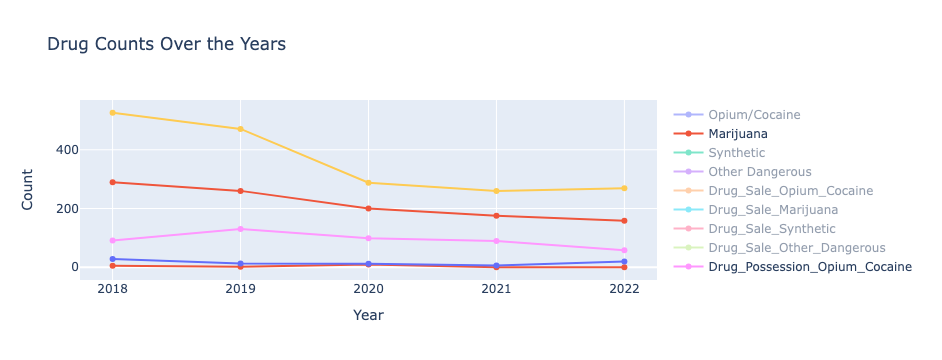

In [130]:
# Plot
fig = go.Figure()

# Add traces
for column in arrest_od_data.columns[0:]:
    fig.add_trace(go.Scatter(x=arrest_od_data.index, y=arrest_od_data[column], mode='lines+markers', name=column))

# Update layout
fig.update_layout(title='Drug Counts Over the Years', xaxis_title='Year', yaxis_title='Count')

# Show plot
fig.show()

Columns needed to graph nicely:
- Drug_Sale_Opium_Cocaine
- Drug_Possession_Opium_Cocaine
- Opium/Cocaine
- Drug_Sale_Marijuana
- Drug_Possession_Marijuana
- Marijuana
- Drug_Possession_Synthetic
- Drug_Sale_Synthetic
- Synthetic
- Drug_Sale_Other_Dangerous
- Drug_Possession_Other_Dangerous
- Other Dangerous
